In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
# update
train = pd.read_csv('./train.csv', parse_dates= ['date'])
train

date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]

In [15]:
test = pd.read_csv('./test.csv', parse_dates= ['date'])
test

id       date  store  item
0          0 2018-01-01      1     1
1          1 2018-01-02      1     1
2          2 2018-01-03      1     1
3          3 2018-01-04      1     1
4          4 2018-01-05      1     1
...      ...        ...    ...   ...
44995  44995 2018-03-27     10    50
44996  44996 2018-03-28     10    50
44997  44997 2018-03-29     10    50
44998  44998 2018-03-30     10    50
44999  44999 2018-03-31     10    50

[45000 rows x 4 columns]

In [16]:
print('Min date from train set : ' + str(train['date'].min().date()))
print('Max date from train set : ' + str(train['date'].max().date()))

Min date from train set : 2013-01-01
Max date from train set : 2017-12-31


In [17]:
lag_size = (test['date'].max().date() - train['date'].max().date()).days 
print('Max date from train set : ' + str(train['date'].max().date()) )
print('Max date from test set : ' +str(test['date'].max().date()) )
print('Forecast lag size', lag_size)

Max date from train set : 2017-12-31
Max date from test set : 2018-03-31
Forecast lag size 90


In [18]:
dates = train.groupby('date', as_index = False)['sales'].sum()
stores = train.groupby(['store', 'date'], as_index = False)['sales'].sum()
items = train.groupby(['item', 'date'], as_index = False)['sales'].sum()

dates

date  sales
0    2013-01-01  13696
1    2013-01-02  13678
2    2013-01-03  14488
3    2013-01-04  15677
4    2013-01-05  16237
...         ...    ...
1821 2017-12-27  20378
1822 2017-12-28  21885
1823 2017-12-29  23535
1824 2017-12-30  24988
1825 2017-12-31  26420

[1826 rows x 2 columns]

In [19]:
stores

store       date  sales
0          1 2013-01-01   1316
1          1 2013-01-02   1264
2          1 2013-01-03   1305
3          1 2013-01-04   1452
4          1 2013-01-05   1499
...      ...        ...    ...
18255     10 2017-12-27   2221
18256     10 2017-12-28   2429
18257     10 2017-12-29   2687
18258     10 2017-12-30   2742
18259     10 2017-12-31   2939

[18260 rows x 3 columns]

In [20]:
items

item       date  sales
0         1 2013-01-01    133
1         1 2013-01-02     99
2         1 2013-01-03    127
3         1 2013-01-04    145
4         1 2013-01-05    149
...     ...        ...    ...
91295    50 2017-12-27    511
91296    50 2017-12-28    587
91297    50 2017-12-29    596
91298    50 2017-12-30    612
91299    50 2017-12-31    626

[91300 rows x 3 columns]

In [21]:
!pip3 install plotly
# !pip3 install "nbformat>=4.2.4.0" notebook

import plotly.graph_objs as go 
from plotly.offline import iplot

plot_dates = go.Scatter(x = dates['date'], y = dates['sales'])
layout = go.Layout(title = 'Daily Sales', xaxis = dict(title= 'Date'), yaxis = dict(title = 'Sales'))
fig = go.Figure(data = [plot_dates], layout = layout)

iplot(fig)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [22]:
plot_stores = [] 
for store in stores['store'].unique(): 
    c_store = stores[(stores['store'] == store)]
    plot_stores.append(go.Scatter(x=c_store['date'], y = c_store['sales'], name = ('Store ' + str(store))))
layout = go.Layout(title = 'Store daily sales', xaxis = dict(title='Date'), yaxis = dict(title = 'Sales'))
fig = go.Figure(data = plot_stores, layout = layout)

iplot(fig)

In [23]:
plot_items = []
for item in items ['item'].unique():
    c_items = items[(items['item'] == item)]
    plot_items.append(go.Scatter(x = c_items['date'], y = c_items['sales'], name = ('Item ' + str(item))))
layout = go.Layout(title = 'Item daily sales', xaxis = dict(title = 'Date'), yaxis = dict(title = 'Sales'))
fig = go.Figure(data = plot_items, layout = layout)

iplot(fig)

In [24]:
indexes_train = []
for i in range(train.store.nunique()*train.item.nunique()) :
    indexes_train = np.append(indexes_train, np.linspace(0, train.date.nunique()-1, train.date.nunique(), dtype = int))
    i = +1
indexes_train

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.823e+03, 1.824e+03,
       1.825e+03])

In [25]:
train["indexes"] = indexes_train
train

date  store  item  sales  indexes
0      2013-01-01      1     1     13      0.0
1      2013-01-02      1     1     11      1.0
2      2013-01-03      1     1     14      2.0
3      2013-01-04      1     1     13      3.0
4      2013-01-05      1     1     10      4.0
...           ...    ...   ...    ...      ...
912995 2017-12-27     10    50     63   1821.0
912996 2017-12-28     10    50     59   1822.0
912997 2017-12-29     10    50     74   1823.0
912998 2017-12-30     10    50     62   1824.0
912999 2017-12-31     10    50     82   1825.0

[913000 rows x 5 columns]

In [2]:
indexes_test = []
test["indexes"] = indexes_test 
test

NameError: name 'test' is not defined

In [ ]:
data = pd.concat([train, test], sort= False)
data 

date  store  item  sales  indexes       id
0     2013-01-01      1     1   13.0      0.0      NaN
1     2013-01-02      1     1   11.0      1.0      NaN
2     2013-01-03      1     1   14.0      2.0      NaN
3     2013-01-04      1     1   13.0      3.0      NaN
4     2013-01-05      1     1   10.0      4.0      NaN
...          ...    ...   ...    ...      ...      ...
44995 2018-03-27     10    50    NaN      NaN  44995.0
44996 2018-03-28     10    50    NaN      NaN  44996.0
44997 2018-03-29     10    50    NaN      NaN  44997.0
44998 2018-03-30     10    50    NaN      NaN  44998.0
44999 2018-03-31     10    50    NaN      NaN  44999.0

[958000 rows x 6 columns]

In [ ]:
hour = 60*60
day = 24*hour 
week = 7*day
year = 365.2425*day 
df1 = data.copy()
df1["index_second"] = df1["indexes"] *day 
df1

date  store  item  sales  indexes       id  index_second
0     2013-01-01      1     1   13.0      0.0      NaN           0.0
1     2013-01-02      1     1   11.0      1.0      NaN       86400.0
2     2013-01-03      1     1   14.0      2.0      NaN      172800.0
3     2013-01-04      1     1   13.0      3.0      NaN      259200.0
4     2013-01-05      1     1   10.0      4.0      NaN      345600.0
...          ...    ...   ...    ...      ...      ...           ...
44995 2018-03-27     10    50    NaN      NaN  44995.0           NaN
44996 2018-03-28     10    50    NaN      NaN  44996.0           NaN
44997 2018-03-29     10    50    NaN      NaN  44997.0           NaN
44998 2018-03-30     10    50    NaN      NaN  44998.0           NaN
44999 2018-03-31     10    50    NaN      NaN  44999.0           NaN

[958000 rows x 7 columns]

In [ ]:
df1["YEAR_index_norm"] = 2 * np.pi * df1["index_second"] / year 
df1["YEAR_cos_index"] = np.cos(df1["YEAR_index_norm"])
df1["YEAR_sin_index"] = np.sin(df1["YEAR_index_norm"])
df1

date  store  item  sales  indexes       id  index_second  \
0     2013-01-01      1     1   13.0      0.0      NaN           0.0   
1     2013-01-02      1     1   11.0      1.0      NaN       86400.0   
2     2013-01-03      1     1   14.0      2.0      NaN      172800.0   
3     2013-01-04      1     1   13.0      3.0      NaN      259200.0   
4     2013-01-05      1     1   10.0      4.0      NaN      345600.0   
...          ...    ...   ...    ...      ...      ...           ...   
44995 2018-03-27     10    50    NaN      NaN  44995.0           NaN   
44996 2018-03-28     10    50    NaN      NaN  44996.0           NaN   
44997 2018-03-29     10    50    NaN      NaN  44997.0           NaN   
44998 2018-03-30     10    50    NaN      NaN  44998.0           NaN   
44999 2018-03-31     10    50    NaN      NaN  44999.0           NaN   

       YEAR_index_norm  YEAR_cos_index  YEAR_sin_index  
0             0.000000        1.000000        0.000000  
1             0.017203        0.999852        0.017202  
2             0.034406        0.999408        0.034399  
3             0.051608        0.998669        0.051585  
4             0.068811        0.997633        0.068757  
...                ...             ...             ...  
44995              NaN             NaN             NaN  
44996              NaN             NaN             NaN  
44997              NaN             NaN             NaN  
44998              NaN             NaN             NaN  
44999              NaN             NaN             NaN  

[958000 rows x 10 columns]

<Axes: >

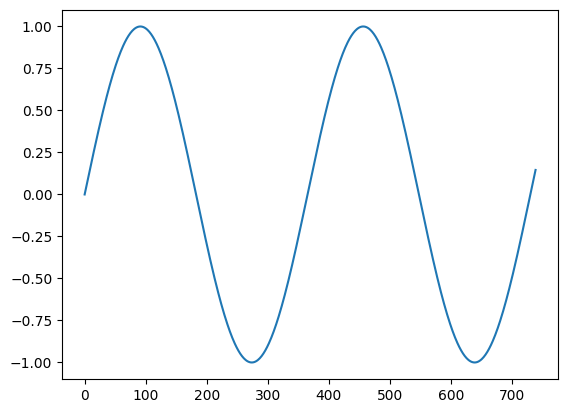

In [ ]:
df1.iloc[0:740, 9].plot()

In [ ]:
df2 = df1.drop(["indexes", "index_second", "YEAR_index_norm"], axis = 1)
df2.head()

date  store  item  sales  id  YEAR_cos_index  YEAR_sin_index
0 2013-01-01      1     1   13.0 NaN        1.000000        0.000000
1 2013-01-02      1     1   11.0 NaN        0.999852        0.017202
2 2013-01-03      1     1   14.0 NaN        0.999408        0.034399
3 2013-01-04      1     1   13.0 NaN        0.998669        0.051585
4 2013-01-05      1     1   10.0 NaN        0.997633        0.068757

In [ ]:
def create_date_time_features(df) : 
    df = df.copy()
    df['dayofweek'] = df.date.dt.dayofweek
    df['quarter'] = df.date.dt.quarter
    df['month'] = df.date.dt.month
    df['year'] = df.date.dt.year 
    df['dayofyear'] = df.date.dt.dayofyear
    df['dayofmonth'] = df.date.dt.day
    df['weekofyear'] = df.date.dt.isocalendar().week.astype("int64")
    df["season"] = np.where(df.month.isin([12, 1, 2]), 0, 1)
    df["season"] = np.where(df.month.isin([6, 7, 8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 12]), 3, df["season"])
    return df

In [ ]:
df3 = df2.copy()
df3 = create_date_time_features(df3)
df3

date  store  item  sales       id  YEAR_cos_index  YEAR_sin_index  \
0     2013-01-01      1     1   13.0      NaN        1.000000        0.000000   
1     2013-01-02      1     1   11.0      NaN        0.999852        0.017202   
2     2013-01-03      1     1   14.0      NaN        0.999408        0.034399   
3     2013-01-04      1     1   13.0      NaN        0.998669        0.051585   
4     2013-01-05      1     1   10.0      NaN        0.997633        0.068757   
...          ...    ...   ...    ...      ...             ...             ...   
44995 2018-03-27     10    50    NaN  44995.0             NaN             NaN   
44996 2018-03-28     10    50    NaN  44996.0             NaN             NaN   
44997 2018-03-29     10    50    NaN  44997.0             NaN             NaN   
44998 2018-03-30     10    50    NaN  44998.0             NaN             NaN   
44999 2018-03-31     10    50    NaN  44999.0             NaN             NaN   

       dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear  \
0              1        1      1  2013          1           1           1   
1              2        1      1  2013          2           2           1   
2              3        1      1  2013          3           3           1   
3              4        1      1  2013          4           4           1   
4              5        1      1  2013          5           5           1   
...          ...      ...    ...   ...        ...         ...         ...   
44995          1        1      3  2018         86          27          13   
44996          2        1      3  2018         87          28          13   
44997          3        1      3  2018         88          29          13   
44998          4        1      3  2018         89          30          13   
44999          5        1      3  2018         90          31          13   

       season  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
44995       1  
44996       1  
44997       1  
44998       1  
44999       1  

[958000 rows x 15 columns]

In [ ]:
def lag_features(df, lags) : 
    for lag in lags :
        df['sales_lag_' + str(lag)] = df.groupby(["store", "item"]) ['sales'].transform(lambda x : x.shift(lag))
        df.fillna(0, inplace= True)
    return df

In [ ]:

df4 = df3.copy()
lag_features(df4, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])
df4

NameError: name 'df3' is not defined

In [ ]:
def roll_mean_features(df, windows) : 
    for window in windows : 
        df['sales_roll_mean' + str(window)] = df.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(1).rolling(window=window, min_periods = 10, win_type = "triang").mean())
        df.fillna(0, inplace = True)
    return df

In [ ]:
df5 = df4.copy()
df5 = roll_mean_features(df5, [365, 546])
df5.tail(10)

NameError: name 'df4' is not defined

In [1]:
def ewm_features (dataframe, alphas, lags) : 
    for alpha in alphas : 
        for lag in lags :
            dataframe['sales_ewm_alpha_' + str(lag)] = dataframe.groupby(["store", "item"])['sales'].transform(lambda x : x.shift(lag).ewm(alpha=alpha).mean())
        dataframe.fillna(0,inplace = True)
        return dataframe

In [3]:
df6 = df5.copy()
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]
df6 = ewm_features(df6, alphas, lags)
df6.tail()

NameError: name 'df5' is not defined

In [4]:
df7 = pd.get_dummies(df6, columns=['store', 'item', 'dayofweek', "quarter", 'month', "year", "season"])
df7.head()

NameError: name 'pd' is not defined

In [5]:
df7['sales'] = np.log1p(df7["sales"].values)
df7.head()

NameError: name 'np' is not defined

In [6]:
print(df7['sales'].max())
print(df7['sales'].min())
print(df7['sales'].mean())

NameError: name 'df7' is not defined

In [7]:
df_model = df7.copy()
df_model = df_model.sort_values("date").reset_index(drop = True)
train = df_model.loc[(df_model["date"] < "2017-01-01"), :]
val = df_model.loc[(df_model["date"] >= "2017-01-01") & (df_model["date"] < "2017-04-01"), :]
train


NameError: name 'df7' is not defined

In [ ]:
cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]]